# APPRENTISSAGE NON-SUPERVISÉ avec Python

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## 1)K-Means CLUSTERING

In [3]:
from sklearn.cluster import KMeans

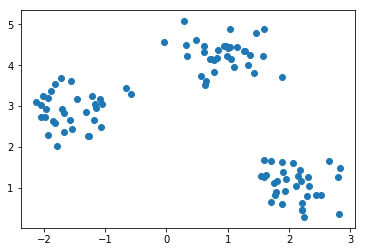

In [4]:
# Génération de données
X, y = make_blobs(n_samples=100, centers=3, cluster_std=0.4, random_state=0)
plt.scatter(X[:,0], X[:,1])

-30.87053128014066

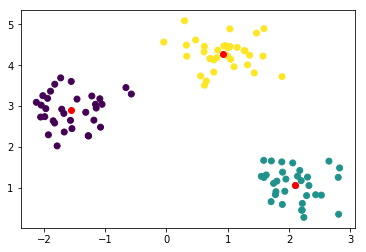

In [13]:
model = KMeans(n_clusters=3)

model.fit(X)
model.predict(X)
plt.scatter(X[:,0], X[:,1],c=model.predict(X))
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c='r')
model.score(X)

### Elbow Method

In [19]:
inertia =[]
k_range = range(1,20)
for k in K_range:
    model = KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)

Text(0,0.5,'Cout du modele (Inertia)')

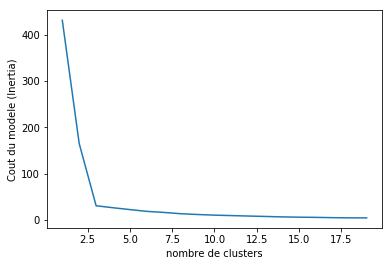

In [20]:
plt.plot(K_range, inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')

## 2. Detection d'anomalies avec Isolation Forest

In [21]:
from sklearn.ensemble import IsolationForest

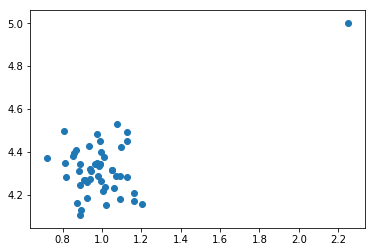

In [22]:
X, y = make_blobs(n_samples=50, centers=1, cluster_std=0.1, random_state=0)
X[-1,:] = np.array([2.25, 5])

plt.scatter(X[:,0], X[:, 1])

In [23]:
model =IsolationForest(contamination=0.01)
model.fit(X)

C:\Users\user.user-PC\Anaconda2\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination=0.01,
        max_features=1.0, max_samples='auto', n_estimators=100,
        n_jobs=None, random_state=None, verbose=0)

C:\Users\user.user-PC\Anaconda2\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


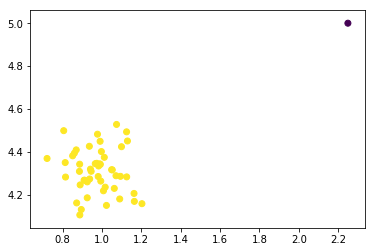

In [24]:
plt.scatter(X[:,0], X[:, 1],c=model.predict(X))

## Application : Digits Outliers

In [25]:
from sklearn.datasets import load_digits

In [26]:
digits = load_digits()
images = digits.images
X=digits.data
y=digits.target

print(X.shape)

(1797, 64)


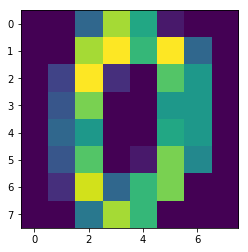

In [54]:
plt.imshow(images[0])

In [32]:
model =IsolationForest(random_state=0,contamination=0.02)
model.fit(X)

IsolationForest(behaviour='old', bootstrap=False, contamination=0.02,
        max_features=1.0, max_samples='auto', n_estimators=100,
        n_jobs=None, random_state=0, verbose=0)

In [53]:
outliers=model.predict(X)==-1
outliers

C:\Users\user.user-PC\Anaconda2\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


array([False, False, False, ..., False, False, False])

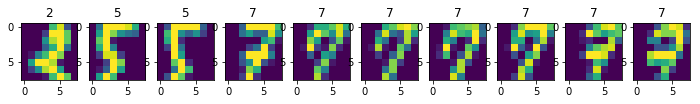

In [52]:
plt.figure(figsize=(12, 3))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(images[outliers][i])
  plt.title(y[outliers][i])

## 3. PCA : Reduction de dimension

### Visualisation 2D

In [55]:
from sklearn.decomposition import PCA

In [56]:
X.shape

(1797, 64)

In [59]:
model = PCA(n_components=2)
X_reduced = model.fit_transform(X)
X_reduced.shape

(1797, 2)

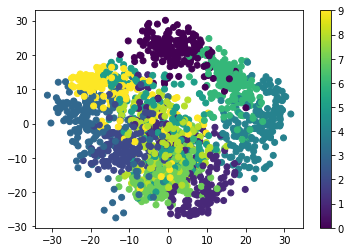

In [61]:
plt.scatter(X_reduced[:,0],X_reduced[:,1],c=y)
plt.colorbar()

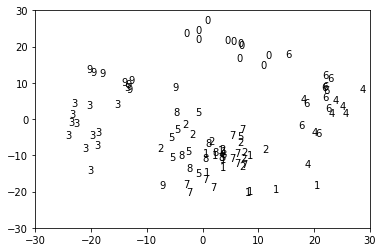

In [64]:
plt.figure()
plt.xlim(-30, 30)
plt.ylim(-30, 30)

for i in range(100):
    plt.text(X_reduced[i,0], X_reduced[i,1], str(y[i]))

### Compression de données

##### methode 1 

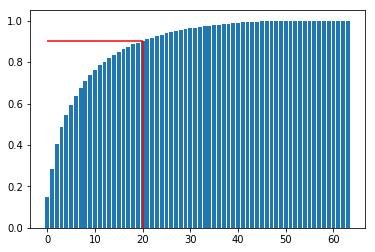

In [84]:

n_dims = X.shape[1]
model = PCA(n_components=n_dims)
model.fit(X)

variances = model.explained_variance_ratio_

meilleur_dims = np.argmax(np.cumsum(variances) > 0.90)


plt.bar(range(n_dims), np.cumsum(variances))
plt.hlines(0.90, 0, meilleur_dims, colors='r')
plt.vlines(meilleur_dims, 0, 0.90, colors='r')


##### methode 2

In [65]:
X.shape

(1797, 64)

In [66]:
model = PCA(n_components=64)
X_reduced = model.fit_transform(X)

In [75]:
np.argmax(np.cumsum(model.explained_variance_ratio_)>0.99) 

40

In [76]:
model = PCA(n_components=40)
X_reduced = model.fit_transform(X)

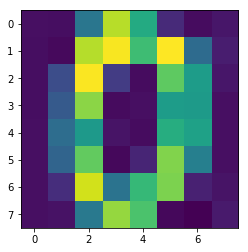

In [79]:
X_recoverd =model.inverse_transform(X_reduced)

plt.imshow(X_recoverd[0].reshape((8,8)))

In [83]:
model = PCA(n_components=0.95)

model.n_components_

29